In [50]:
import numpy as np
import scipy as sp
import scipy.signal as signal
import sympy as sym

from scipy.io import wavfile

import matplotlib.pyplot as plt

from tqdm import tqdm

import utils

# %matplotlib widget

In [51]:
fs1, s1 = wavfile.read('./experiment_2/voice_noise_3.wav')
fs2 = fs1
#fs2, s2 = wavfile.read('./experiment_2/tongue_twister_2_clap.wav')

# fs1, s1 = wavfile.read('./experiment_2/first.wav')
# fs2, s2 = wavfile.read('./experiment_2/second.wav')

s2 = s1[:, 1].astype(np.float32)
s1 = s1[:, 0].astype(np.float32)
# s2 = s2.astype(np.float32)


s1/=np.max(np.abs(s1))
s2/=np.max(np.abs(s2))

In [52]:
# utils.play_audios(s1.reshape(1, -1), fs1, norm_coef=1)
# utils.play_audios(s2.reshape(1, -1), fs1, norm_coef=1)

In [53]:
np.mean(s1**2), np.mean(s2**2)

(0.014194855, 0.012570587)

In [54]:
# cutoff = 2800
# ds_coef = 8

cutoff = 7000
ds_coef = 3

# cutoff = 16000
# ds_coef = 1

s1 = signal.filtfilt(b=signal.firwin(1000, cutoff=cutoff, window='hann', fs=fs1), a=[1], x=s1)
s2 = signal.filtfilt(b=signal.firwin(1000, cutoff=cutoff, window='hann', fs=fs1), a=[1], x=s2)

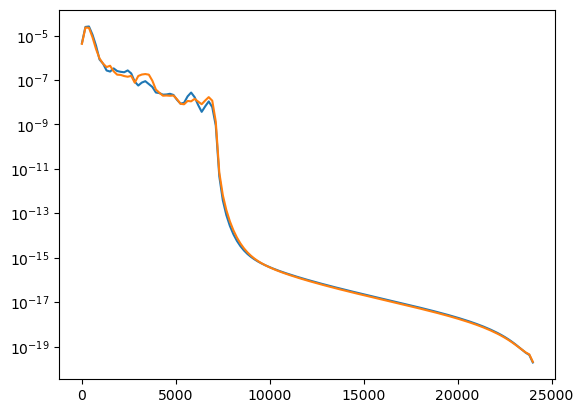

In [55]:
f, psd1 = signal.welch(s1, fs=fs1)
_, psd2 = signal.welch(s2, fs=fs2)

plt.figure()
plt.semilogy(f, psd1)
plt.semilogy(f, psd2)
plt.show()

In [56]:
s1 = signal.resample_poly(s1, up=1, down=ds_coef, window='hann')
s2 = signal.resample_poly(s2, up=1, down=ds_coef, window='hann')
fs1//=ds_coef
fs2//=ds_coef

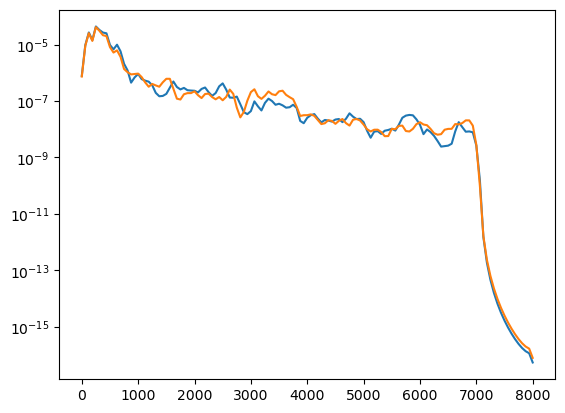

In [57]:
f, psd1 = signal.welch(s1, fs=fs1)
_, psd2 = signal.welch(s2, fs=fs2)

plt.figure()
plt.semilogy(f, psd1)
plt.semilogy(f, psd2)
plt.show()

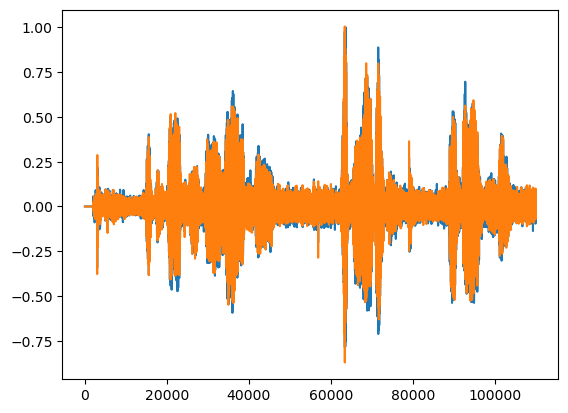

In [58]:
plt.figure()
plt.plot(s1)
plt.plot(s2)
#plt.xlim([300000, 320000])
plt.show()

In [59]:
#k_start = 540_000 // ds_coef
k_start = 0

In [60]:
#a = abs(s1[:k_start])
#b = abs(s2[:k_start])

a = s1
b = s2

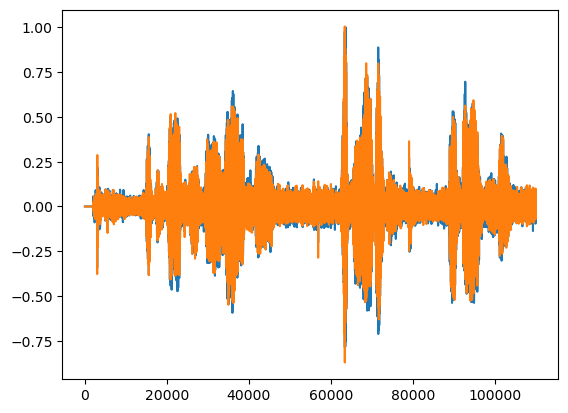

In [61]:
plt.figure()
plt.plot(a)
plt.plot(b)
#plt.xlim([300000, 320000])
plt.show()

Time alignment for one record with 2 channels makes it worse

This is because delays for different sound sources vary __inside__ each sound mixture on each mic. Alignment helps only with recordings' starting time synchronization

In [62]:
delay_compensation = False

In [63]:
if delay_compensation:
    R = signal.convolve(a, b[::-1], mode='full', method='fft')
    delay = np.argmax(np.abs(R)) - b.shape[0]
    
    plt.figure(figsize=(8, 3))
    plt.plot(R)
    plt.show()
else:
    delay = 0
    
print(f'Delay: {delay}')
if delay > 0:
    s1 = s1[delay:]
else:
    s2 = s2[-delay:]

k_length = min(s1.shape[0], s2.shape[0])
print(f'Number of samples: {k_length}')

s1 = s1[k_start:k_length]
s2 = s2[k_start:k_length]

Delay: 0
Number of samples: 109910


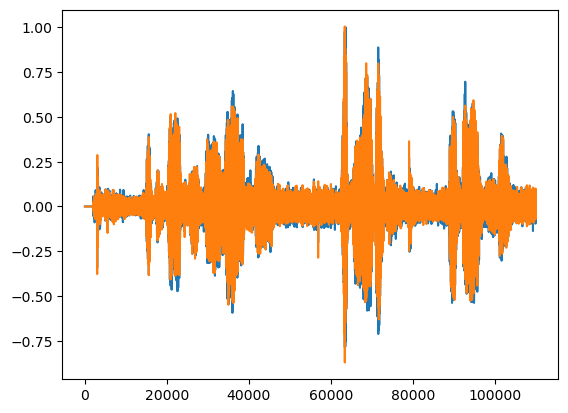

In [64]:
plt.figure()
plt.plot(s1)
plt.plot(s2)
#plt.plot((s1-s2)**2)
#plt.xlim([425000, 427000])
plt.show()

In [65]:
#utils.play_audios(np.stack((s1, s2)), fs1, norm_coef=0.1)

In [66]:
wavfile.write('./experiment_2/first.wav', fs1, s1)
wavfile.write('./experiment_2/second.wav', fs2, s2)